##  Data Augmentation


### 🎯 What is Data Augmentation?

**The Problem:**
- You have only 100 videos to train a model
- The model needs thousands of examples to learn well
- Collecting more data is expensive and time-consuming

**The Solution:**
Data Augmentation = Creating slightly modified copies of existing data


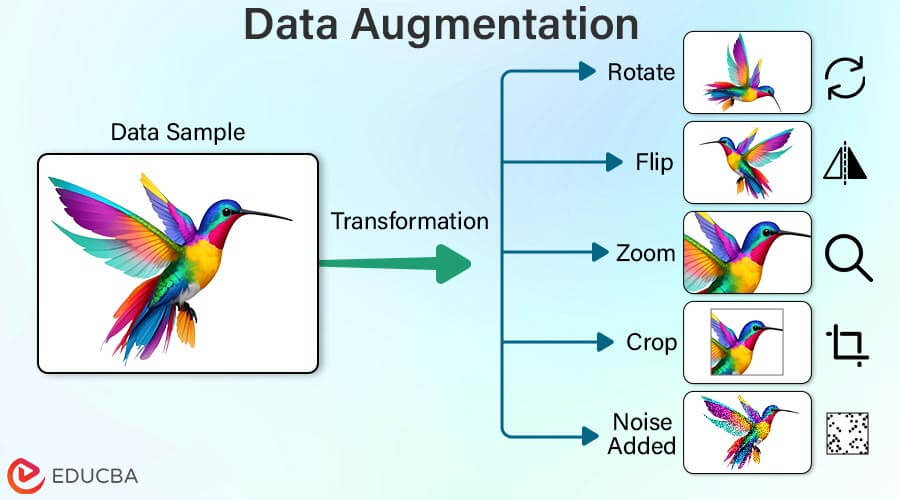

In [37]:
import numpy as np
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer

In [38]:
pose_file_1 = '../data/pose_files/SGB_FSS_original.pose'
save_path = "../output/06_Augmentation/"

In [39]:

def load_pose(path: str) -> Pose:
    with open(path, 'rb') as f:
        return Pose.read(f.read())

def save_as_pose(pose: Pose, output_path: str):
    """
    Saves a Pose object to a .pose file.
    """
    with open(output_path, 'wb') as f:
        pose.write(f)
    print(f"✅ Saved to: {output_path}")

In [40]:
pose = load_pose(pose_file_1)
save_as_pose(pose, save_path + "loaded_pose.pose")

✅ Saved to: ../output/06_Augmentation/loaded_pose.pose


In [41]:
def augment_pose_2d(pose: Pose, 
                    rotation_std: float = 0.2,
                    shear_std: float = 0.2,
                    scale_std: float = 0.2) -> Pose:
    """
    2D augmentation for pose
    
    Parameters:
    -----------
    rotation_std : float
        Standard deviation for rotation (in radians)
    shear_std : float
        Standard deviation for shearing
    scale_std : float
        Standard deviation for scaling
    """
    pose_copy = pose.copy()
    
    augmented = pose_copy.augment2d(
        rotation_std=rotation_std,
        shear_std=shear_std,
        scale_std=scale_std
    )
    
    print(f"✅ 2D augmentation completed")
    print(f"   rotation_std={rotation_std}")
    print(f"   shear_std={shear_std}")
    print(f"   scale_std={scale_std}")
    
    return augmented

augmented = augment_pose_2d(pose, rotation_std=0.1)
save_as_pose(augmented, save_path + "augmented_rotation.pose")


✅ 2D augmentation completed
   rotation_std=0.1
   shear_std=0.2
   scale_std=0.2
✅ Saved to: ../output/06_Augmentation/augmented_rotation.pose


In [42]:
def create_augmented_dataset(pose: Pose, num_augmentations: int = 10) -> list:
    """
    Create an augmented dataset
    """
    augmented_poses = [pose.copy()]  # Original
    
    for i in range(num_augmentations):
        # Randomly change augmentation parameters
        rotation = np.random.uniform(0.05, 0.3)
        shear = np.random.uniform(0.05, 0.2)
        scale = np.random.uniform(0.05, 0.2)
        
        aug = pose.copy().augment2d(
            rotation_std=rotation,
            shear_std=shear,
            scale_std=scale
        )
        augmented_poses.append(aug)
    
    print(f"✅ Created {len(augmented_poses)} versions (1 original + {num_augmentations} augmented)")
    return augmented_poses



In [43]:
augmented_dataset = create_augmented_dataset(pose, num_augmentations=5)
for idx, aug_pose in enumerate(augmented_dataset):
    save_as_pose(aug_pose, save_path + f"augmented_{idx}.pose")

✅ Created 6 versions (1 original + 5 augmented)
✅ Saved to: ../output/06_Augmentation/augmented_0.pose
✅ Saved to: ../output/06_Augmentation/augmented_1.pose
✅ Saved to: ../output/06_Augmentation/augmented_2.pose
✅ Saved to: ../output/06_Augmentation/augmented_3.pose
✅ Saved to: ../output/06_Augmentation/augmented_4.pose
✅ Saved to: ../output/06_Augmentation/augmented_5.pose


## Flipping Pose (Flip)

In [44]:
def flip_pose(pose: Pose, axis: int = 0) -> Pose:
    """
    Flip the pose on a specific axis
    
    Parameters:
    -----------
    axis : int
        0 = horizontal flip (X)
        1 = vertical flip (Y)
        2 = depth flip (Z)
    """
    flipped = pose.flip(axis=axis)
    
    axis_names = {0: 'X (horizontal)', 1: 'Y (vertical)', 2: 'Z (depth)'}
    print(f"✅ Pose flipped on axis {axis_names.get(axis, axis)}")

    return flipped

# Horizontal flip (mirror-like)
flipped = flip_pose(pose, axis=0)
save_as_pose(flipped, save_path + "flipped_horizontal.pose")

✅ Pose flipped on axis X (horizontal)
✅ Saved to: ../output/06_Augmentation/flipped_horizontal.pose


In [45]:
def mirror_pose_for_augmentation(pose: Pose) -> Pose:
    """
    Flip the pose horizontally (for augmentation)
    Useful for doubling training data
    """
    mirrored = pose.flip(axis=0)
    print("✅ Mirrored version created")
    return mirrored

mirrored = mirror_pose_for_augmentation(pose)
save_as_pose(mirrored, save_path + "mirrored.pose")

✅ Mirrored version created
✅ Saved to: ../output/06_Augmentation/mirrored.pose
